# Homework 11: Neural networks

Go over the steps of the ZIP code examples in Chapter 11 and replicate as much as you can with your own project data. Don't forget to read the whole chapter before you start.

In the example shown in the books, they use the character recongition task of classification of written numerals. They mention that the concept of black box in a neuran network is not suited for a pattern recognition task, because the pixel representation of the images lack invariances, and as a concecuence, early attempts with the use of neural networks yielded around 4.5% on missclassification.

For this example they fit different networks to the data:

- **Net-1:** No hidden layer, equivalent to multinomial logistic regression.
- **Net-2:** One hidden layer, 12 hidden units fully connected.
- **Net-3:** Two hidden layers locally connected.
- **Net-4:** Two hidden layers, locally connected with weight sharing.
- **Net-5:** Two hidden layers, locally connected, two levels of weight sharing.

So for this example in order to replicate it, we first need to have some considerations. In the book they mention that the input is of 256 for the 16x16 input pixels an 10 output units for each of the digits from 0 to 9. They also mention that all the networks have sigmoidal output units and were fit with the sum-of-squares error function.

We are going to start to build them one by one. 


### Net-1

In the book they mention that this first network has no hidden layer and is nearly equivalent to a linear multinomial regression model. So we are going to use tensorflow and keras to build a simple model, just like the one they describe in the books with the same tools we use to build our own CNN.

In [1]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.layers import LocallyConnected2D
from tensorflow.keras.layers import LocallyConnected1D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Reshape
from tensorflow.keras.utils import plot_model
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from matplotlib import pyplot as plt
from random import randint



In [2]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()
x_train_drawing = x_train

image_size = 784 # 28 x 28

x_train = x_train.reshape(x_train.shape[0], image_size) 
x_test = x_test.reshape(x_test.shape[0], image_size)

num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

data_slice = 3000
x_train = x_train[:data_slice,:]
y_train = y_train[:data_slice,:]
x_test = x_test[:data_slice,:]
y_test = y_test[:data_slice,:]

x_train.shape

(3000, 784)

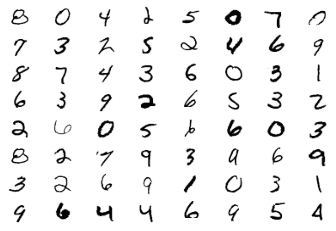

In [3]:
for i in range(64):
    ax = plt.subplot(8, 8, i+1)
    ax.axis('off')
    plt.savefig('/Users/MayraBerrones/Documents/VisualCode/minist_test.png')
    plt.imshow(x_train_drawing[randint(0, x_train.shape[0])], cmap='Greys')

In [4]:
model = Sequential()
model.add(Dense(units=num_classes, activation='sigmoid', input_shape=(image_size,)))
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 2400 samples, validate on 600 samples
Epoch 1/30
2400/2400 [==============================] - 2s 785us/sample - loss: 5.1945 - acc: 0.1758 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 2/30
2400/2400 [==============================] - 2s 746us/sample - loss: 1.1921e-07 - acc: 0.0938 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 3/30
2400/2400 [==============================] - 2s 754us/sample - loss: 1.1921e-07 - acc: 0.0938 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 4/30
2400/2400 [==============================] - 2s 746us/sample - loss: 1.1921e-07 - acc: 0.0938 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 5/30
2400/2400 [==============================] - 2s 762us/sample - loss: 1.1921e-07 - acc: 0.0938 - val_loss: 1.1921e-07 - val_acc: 0.1000
Epoch 6/30
2400/2400 [==============================] - 2s 746us/sample - loss: 1.1921e-07 - acc: 0.0938 - val_loss: 1.1921e-07 - val

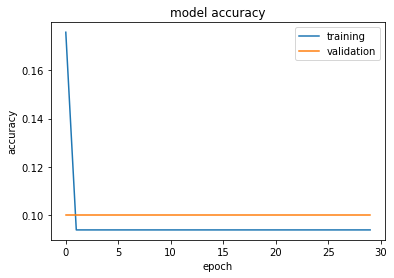

Test loss: 1.19e-07
Test accuracy: 0.0903


In [5]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(x_train, y_train, 
                batch_size=16, 
                epochs=30,
                validation_steps = 1000,
                validation_split=0.2)
loss, accuracy  = model.evaluate(x_test, y_test)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.savefig('/Users/MayraBerrones/Documents/VisualCode/model_1plot.png')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

In [6]:
model_2 = Sequential()
model_2.add(Dense(units=12, activation='sigmoid', input_shape=(image_size,) ))
model_2.add(Dense(units=num_classes, activation='sigmoid'))
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 12)                9420      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                130       
Total params: 9,550
Trainable params: 9,550
Non-trainable params: 0
_________________________________________________________________


Train on 2400 samples, validate on 600 samples
Epoch 1/30
2400/2400 [==============================] - 2s 810us/sample - loss: 1.6197 - acc: 0.5483 - val_loss: 1.5405 - val_acc: 0.6183
Epoch 2/30
2400/2400 [==============================] - 2s 791us/sample - loss: 1.4898 - acc: 0.6075 - val_loss: 1.4036 - val_acc: 0.6350
Epoch 3/30
2400/2400 [==============================] - 2s 786us/sample - loss: 1.3915 - acc: 0.6446 - val_loss: 1.3698 - val_acc: 0.6833
Epoch 4/30
2400/2400 [==============================] - 2s 795us/sample - loss: 1.3164 - acc: 0.6700 - val_loss: 1.2274 - val_acc: 0.6983
Epoch 5/30
2400/2400 [==============================] - 2s 791us/sample - loss: 1.2291 - acc: 0.6883 - val_loss: 1.2026 - val_acc: 0.6883
Epoch 6/30
2400/2400 [==============================] - 2s 782us/sample - loss: 1.1937 - acc: 0.6896 - val_loss: 1.1333 - val_acc: 0.6933
Epoch 7/30
2400/2400 [==============================] - 2s 789us/sample - loss: 1.1263 - acc: 0.7279 - val_loss: 1.1200 - val

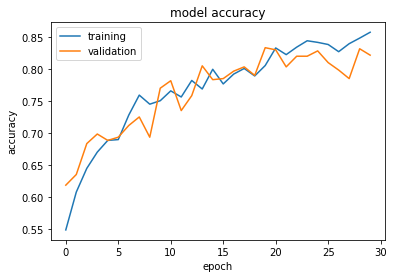

Test loss: 0.757
Test accuracy: 0.764


In [8]:
model_2.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])
history = model_2.fit(x_train, y_train, 
                batch_size=16, 
                epochs=30,
                validation_steps = 1000,
                validation_split=0.2)
loss, accuracy  = model_2.evaluate(x_test, y_test)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.savefig('/Users/MayraBerrones/Documents/VisualCode/model_2plot.png')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

In [9]:
import numpy as np

def modelo_3():
    input_dim = (28, 28,1)
    input_ = Input(input_dim, name = 'the_input')
    layer1 = LocallyConnected2D(1, 2, strides= 2, activation= 'sigmoid', name = 'layer1')(input_)
    layer2 = LocallyConnected2D(1, 5, activation='sigmoid', name = 'layer2')(layer1)
    layer3 = Flatten(name='layer3')(layer2) 
    output = Dense(units=num_classes, activation='sigmoid', name = 'output')(layer3)

    model = Model(inputs = input_, outputs = output)
    model.summary()
    input_dim = np.expand_dims(input_dim, axis=0)

    return model

model = modelo_3()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
the_input (InputLayer)       [(None, 28, 28, 1)]       0         
_________________________________________________________________
layer1 (LocallyConnected2D)  (None, 14, 14, 1)         980       
_________________________________________________________________
layer2 (LocallyConnected2D)  (None, 10, 10, 1)         2600      
_________________________________________________________________
layer3 (Flatten)             (None, 100)               0         
_________________________________________________________________
output (Dense)               (None, 10)                1010      
Total params: 4,590
Trainable params: 4,590
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

Train on 2400 samples, validate on 600 samples
Epoch 1/30
2400/2400 [==============================] - 7s 3ms/sample - loss: 0.3553 - acc: 0.8816 - val_loss: 0.3203 - val_acc: 0.9000
Epoch 2/30
2400/2400 [==============================] - 6s 2ms/sample - loss: 0.3160 - acc: 0.9000 - val_loss: 0.3112 - val_acc: 0.9000
Epoch 3/30
2400/2400 [==============================] - 6s 2ms/sample - loss: 0.3052 - acc: 0.9000 - val_loss: 0.2970 - val_acc: 0.9000
Epoch 4/30
2400/2400 [==============================] - 6s 2ms/sample - loss: 0.2889 - acc: 0.9000 - val_loss: 0.2781 - val_acc: 0.9000
Epoch 5/30
2400/2400 [==============================] - 6s 2ms/sample - loss: 0.2668 - acc: 0.9000 - val_loss: 0.2542 - val_acc: 0.9000
Epoch 6/30
2400/2400 [==============================] - 6s 2ms/sample - loss: 0.2427 - acc: 0.9020 - val_loss: 0.2306 - val_acc: 0.9052
Epoch 7/30
2400/2400 [==============================] - 6s 2ms/sample - loss: 0.2191 - acc: 0.9091 - val_loss: 0.2080 - val_acc: 0.9150
E

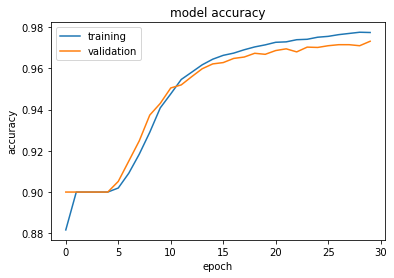

Test loss: 0.0994
Test accuracy: 0.965


In [11]:
history = model.fit(x_train.reshape([-1,28, 28,1]), y_train, 
                batch_size=16, 
                epochs=30,
                validation_steps = 1000,
                validation_split=0.2)
loss, accuracy  = model.evaluate(x_test.reshape([-1,28, 28,1]), y_test)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.savefig('/Users/MayraBerrones/Documents/VisualCode/model_3plot.png')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

model_3 = Sequential()
model_3.add(LocallyConnected2D(1, 2, strides= 2, activation= 'sigmoid', input_shape=(28, 28, 1) ))
model_3.add(LocallyConnected2D(1, 5, activation='sigmoid'))
model_3.add(Flatten())
#model_3.add(LocallyConnected1D(8, 8, input_shape = (28, 28)))
#model_3.add(LocallyConnected1D(4, 4))
model_3.add(Dense(units=num_classes, activation='sigmoid'))
model_3.summary()

In [12]:
def modelo_4():
    input_dim = (28, 28, 1)
    input_ = Input(input_dim, name = 'the_input')
    layer1 = Conv2D(2, 2, strides= 2, activation= 'sigmoid', name = 'layer1')(input_)
    layer2 = LocallyConnected2D(1, 5, activation='sigmoid', name = 'layer2')(layer1)
    layer3 = Flatten(name='layer3')(layer2) 
    output = Dense(units=num_classes, activation='sigmoid', name = 'output')(layer3)

    model = Model(inputs = input_, outputs = output)
    model.summary()
    input_dim = np.expand_dims(input_dim, axis=0)

    return model

model = modelo_4()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
the_input (InputLayer)       [(None, 28, 28, 1)]       0         
_________________________________________________________________
layer1 (Conv2D)              (None, 14, 14, 2)         10        
_________________________________________________________________
layer2 (LocallyConnected2D)  (None, 10, 10, 1)         5100      
_________________________________________________________________
layer3 (Flatten)             (None, 100)               0         
_________________________________________________________________
output (Dense)               (None, 10)                1010      
Total params: 6,120
Trainable params: 6,120
Non-trainable params: 0
_________________________________________________________________


Train on 2400 samples, validate on 600 samples
Epoch 1/30
2400/2400 [==============================] - 5s 2ms/sample - loss: 0.3448 - acc: 0.8896 - val_loss: 0.3130 - val_acc: 0.9000
Epoch 2/30
2400/2400 [==============================] - 5s 2ms/sample - loss: 0.3051 - acc: 0.9000 - val_loss: 0.2926 - val_acc: 0.9000
Epoch 3/30
2400/2400 [==============================] - 5s 2ms/sample - loss: 0.2790 - acc: 0.9000 - val_loss: 0.2601 - val_acc: 0.9000
Epoch 4/30
2400/2400 [==============================] - 5s 2ms/sample - loss: 0.2465 - acc: 0.9031 - val_loss: 0.2261 - val_acc: 0.9108
Epoch 5/30
2400/2400 [==============================] - 5s 2ms/sample - loss: 0.2144 - acc: 0.9158 - val_loss: 0.1965 - val_acc: 0.9218
Epoch 6/30
2400/2400 [==============================] - 5s 2ms/sample - loss: 0.1874 - acc: 0.9249 - val_loss: 0.1730 - val_acc: 0.9327
Epoch 7/30
2400/2400 [==============================] - 5s 2ms/sample - loss: 0.1667 - acc: 0.9351 - val_loss: 0.1549 - val_acc: 0.9435
E

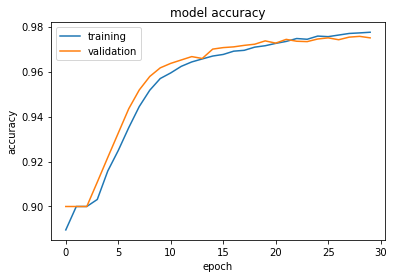

Test loss: 0.0959
Test accuracy: 0.966


In [13]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train.reshape([-1,28, 28,1]), y_train, 
                batch_size=16, 
                epochs=30,
                validation_steps = 1000,
                validation_split=0.2)
loss, accuracy  = model.evaluate(x_test.reshape([-1,28, 28,1]), y_test)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.savefig('/Users/MayraBerrones/Documents/VisualCode/model_4plot.png')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')

In [14]:
def modelo_5():
    input_dim = (28, 28, 1)
    input_ = Input(input_dim, name = 'the_input')
    layer1 = Conv2D(2, 2, strides= 2, activation= 'sigmoid', name = 'layer1')(input_)
    layer2 = Conv2D(4, 5, activation='sigmoid', name = 'layer2')(layer1)
    layer3 = Flatten(name='layer3')(layer2) 
    output = Dense(units=num_classes, activation='sigmoid', name = 'output')(layer3)

    model = Model(inputs = input_, outputs = output)
    model.summary()
    input_dim = np.expand_dims(input_dim, axis=0)

    return model

model = modelo_5()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
the_input (InputLayer)       [(None, 28, 28, 1)]       0         
_________________________________________________________________
layer1 (Conv2D)              (None, 14, 14, 2)         10        
_________________________________________________________________
layer2 (Conv2D)              (None, 10, 10, 4)         204       
_________________________________________________________________
layer3 (Flatten)             (None, 400)               0         
_________________________________________________________________
output (Dense)               (None, 10)                4010      
Total params: 4,224
Trainable params: 4,224
Non-trainable params: 0
_________________________________________________________________


Train on 2400 samples, validate on 600 samples
Epoch 1/30
2400/2400 [==============================] - 2s 944us/sample - loss: 0.3341 - acc: 0.8923 - val_loss: 0.3117 - val_acc: 0.9000
Epoch 2/30
2400/2400 [==============================] - 2s 845us/sample - loss: 0.2942 - acc: 0.9000 - val_loss: 0.2643 - val_acc: 0.9003
Epoch 3/30
2400/2400 [==============================] - 2s 820us/sample - loss: 0.2273 - acc: 0.9094 - val_loss: 0.1871 - val_acc: 0.9278
Epoch 4/30
2400/2400 [==============================] - 2s 820us/sample - loss: 0.1693 - acc: 0.9345 - val_loss: 0.1460 - val_acc: 0.9503
Epoch 5/30
2400/2400 [==============================] - 2s 816us/sample - loss: 0.1392 - acc: 0.9504 - val_loss: 0.1260 - val_acc: 0.9528
Epoch 6/30
2400/2400 [==============================] - 2s 826us/sample - loss: 0.1231 - acc: 0.9570 - val_loss: 0.1129 - val_acc: 0.9593
Epoch 7/30
2400/2400 [==============================] - 2s 809us/sample - loss: 0.1120 - acc: 0.9610 - val_loss: 0.1029 - val

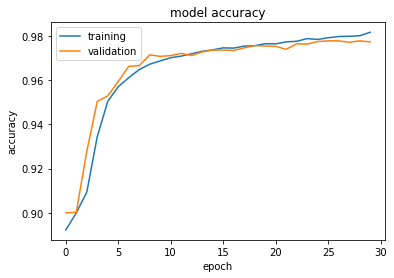

Test loss: 0.0829
Test accuracy: 0.971


In [15]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(x_train.reshape([-1,28, 28,1]), y_train, 
                batch_size=16, 
                epochs=30,
                validation_steps = 1000,
                validation_split=0.2)
loss, accuracy  = model.evaluate(x_test.reshape([-1,28, 28,1]), y_test)
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.savefig('/Users/MayraBerrones/Documents/VisualCode/model_5plot.png')
plt.show()

print(f'Test loss: {loss:.3}')
print(f'Test accuracy: {accuracy:.3}')